## **Desafio 3**

Introduccion:

## Importacion de los datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score

import statsmodels.api as sm
from statsmodels.tools import eval_measures

from sklearn.metrics import classification_report
sns.set_context('poster')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv("/content/drive/MyDrive/Digital_House_D03/Aprender2018-primaria-6.csv",sep=';',na_values=[' '],decimal=',').dropna()

In [4]:
display(data.head(3))
data.loc[0,'mpuntaje']

,ap1,ap2,ap3a,ap3b,ap3c,ap4,ap5a,ap5b,ap5c,ap5d,...,ponder,lpondera,ldesemp,lpuntaje,mpondera,mdesemp,mpuntaje,isocioa,isocioal,isocioam
0,4,2,1,1,1,10,2,2,1,2,...,3.164231,3.478725,4.0,624.30237,3.637901,3.0,497.96060,-1,-1.0,-1.0
1,2,1,1,1,1,4,1,1,-9,1,...,3.164231,3.478725,3.0,541.39209,3.637901,3.0,511.72632,1,1.0,1.0
2,2,1,1,1,1,6,1,1,-9,1,...,3.164231,3.478725,3.0,470.68723,3.637901,3.0,497.24191,2,2.0,2.0


497.9606

In [5]:
data.ICSE.unique()

array([1., 3., 2.])

In [6]:
#data = data.applymap(lambda x : float(x.replace(',','.')) if isinstance(x,str)else x)

In [7]:
data.dtypes.value_counts()

int64      114
float64     10
dtype: int64

## EDA

3.0    207129
2.0    121297
4.0    111642
1.0     99366
Name: mdesemp, dtype: int64


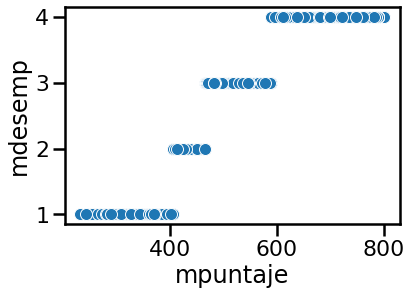

In [ ]:
sns.scatterplot(x=data.mpuntaje.sample(10000,random_state=1),y=data.mdesemp.sample(10000,random_state=1))
print(data.mdesemp.value_counts())

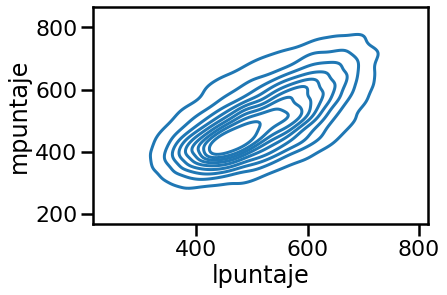

In [ ]:
sns.kdeplot(x=data.lpuntaje.sample(10000,random_state=1),y=data.mpuntaje.sample(10000,random_state=1))

In [ ]:
# sns.kdeplot(x=data.lpondera.sample(10000,random_state=1).astype('float'),y=data.mpondera.sample(10000,random_state=1).astype('float'))
# plt.xlim(0.5,3.5)
# plt.ylim(0.5,3.5)

In [ ]:
# sns.kdeplot(x=data.mpuntaje.sample(10000,random_state=1).astype('float'),y=data.mpondera.sample(10000,random_state=1).astype('float'))
# #sns.kdeplot(x=data.ponder,y=data.mpondera)
# #plt.xlim(0.5,3.5)
# plt.ylim(0.5,3.5)

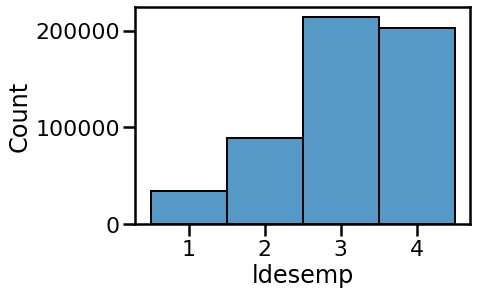

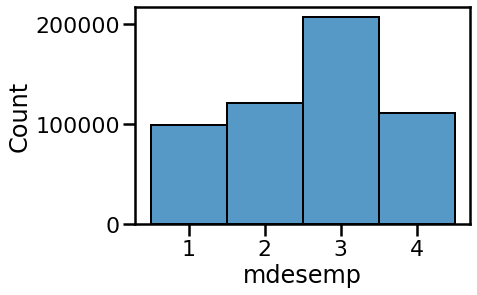

In [ ]:
sns.histplot(data=data,x='ldesemp',discrete=True)
plt.show()
sns.histplot(data=data,x='mdesemp',discrete=True)

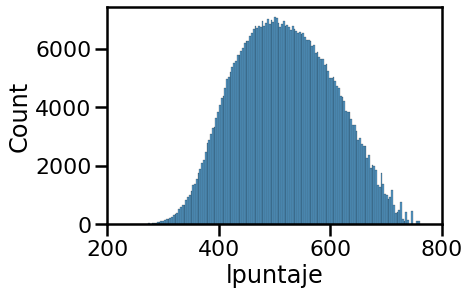

(200.0, 800.0)

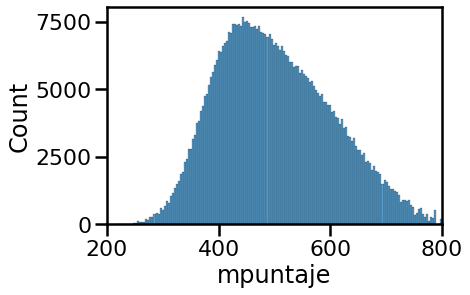

In [ ]:
sns.histplot(data=data,x='lpuntaje')
plt.xlim(200,800)
plt.show()
sns.histplot(data=data,x='mpuntaje')
plt.xlim(200,800)

In [ ]:
data.columns

Index(['ap1', 'ap2', 'ap3a', 'ap3b', 'ap3c', 'ap4', 'ap5a', 'ap5b', 'ap5c',
       'ap5d',
       ...
       'ponder', 'lpondera', 'ldesemp', 'lpuntaje', 'mpondera', 'mdesemp',
       'mpuntaje', 'isocioa', 'isocioal', 'isocioam'],
      dtype='object', length=124)

Columna : ap21a


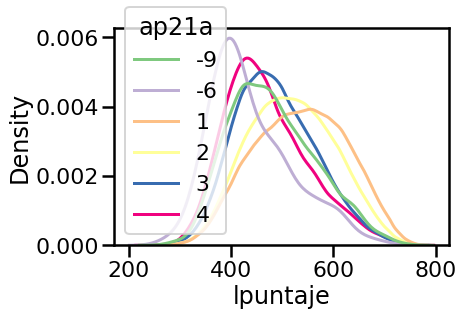

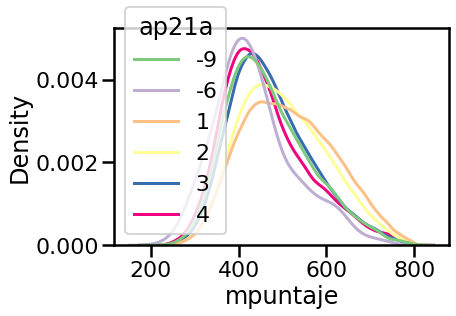

In [74]:
hue='ap21a'#data.columns[1]
#ap21a = En tu opinion como lees?
print('Columna :',hue)
sns.kdeplot(data=data,x='lpuntaje',hue=hue,palette='Accent',common_norm=False)
plt.show()
sns.kdeplot(data=data,x='mpuntaje',hue=hue,palette='Accent',common_norm=False)

In [ ]:
data.isnull().sum().sum()

0

## Feature Engineering

In [9]:
data_trabajo = data.copy()#.replace(to_replace=[-6,-9],value=0)
data_trabajo.iloc[:,-20:].head(5)#descartamos pondera, lpondera, mpondera, continuas: lpuntaje, mpuntaje

,ap39,ap40,ap41a,ap41b,ap41c,ap42,cod_provincia,sector,ambito,ICSE,ponder,lpondera,ldesemp,lpuntaje,mpondera,mdesemp,mpuntaje,isocioa,isocioal,isocioam
0,-1,-1,3,3,3,-1,6,1,1,1.0,3.164231,3.478725,4.0,624.30237,3.637901,3.0,497.96060,-1,-1.0,-1.0
1,-1,-1,3,3,2,-1,6,1,1,1.0,3.164231,3.478725,3.0,541.39209,3.637901,3.0,511.72632,1,1.0,1.0
2,-1,-1,3,-9,-9,-1,6,1,1,1.0,3.164231,3.478725,3.0,470.68723,3.637901,3.0,497.24191,2,2.0,2.0
3,-1,-1,3,4,2,-1,6,1,1,3.0,2.203661,2.208158,2.0,434.76788,2.210872,1.0,364.33578,3,3.0,3.0
4,-1,-1,1,3,1,-1,6,1,1,3.0,2.203661,2.208158,2.0,418.23492,2.210872,1.0,366.13287,2,2.0,2.0


In [10]:
# Armamos las columnas Blanco y Multimarca

dic = {-9:'Blanco',-6:'Multimarca'}

for i in dic.keys():
  data_trabajo[dic[i]] = (data_trabajo == i).sum(axis=1)

In [11]:
# Armamos la columna Personas/Habitaciones

data_trabajo['Personas/Habitaciones'] = data_trabajo.ap4/data_trabajo.ap6

In [12]:
# Armamos la columna 'N°_Servicios'

data_trabajo['N°_Servicios'] = (data.loc[:,['ap7a','ap7b','ap7c','ap7d','ap7e','ap7f']] == 1).sum(axis=1)

In [13]:
# Armamos la columna 'N°_Tareas_domesticas'

col_list = ['ap13a','ap13b','ap13c']

data_trabajo['N°_Tareas_domesticas_1'] = (data.loc[:,col_list] == 1).sum(axis=1)
data_trabajo['N°_Tareas_domesticas_2'] = (data.loc[:,col_list] == 2).sum(axis=1)
data_trabajo['N°_Tareas_domesticas_3'] = (data.loc[:,col_list] == 3).sum(axis=1)
data_trabajo['N°_Tareas_domesticas_4'] = (data.loc[:,col_list] == 4).sum(axis=1)

In [14]:
# Armamos la columna 'N°_discriminacion' sumando los distintos tipos de discriminacion o bullying observados

#modificar ya que hay mas respuestas que 1

col_list = ['ap25a','ap25b','ap25c','ap25d','ap25e','ap25f','ap25g','ap25h']

data_trabajo['N°_Discriminacion_1'] = (data.loc[:,col_list] == 1).sum(axis=1)
data_trabajo['N°_Discriminacion_2'] = (data.loc[:,col_list] == 2).sum(axis=1)
data_trabajo['N°_Discriminacion_3'] = (data.loc[:,col_list] == 3).sum(axis=1)
data_trabajo['N°_Discriminacion_4'] = (data.loc[:,col_list] == 4).sum(axis=1)


In [15]:
# Armamos la columna 'N°_Actividades_extracurriculares'

data_trabajo['N°_Actividades_extracurriculares'] = (data.loc[:,['ap26a','ap26b','ap26c','ap26d']] == 1).sum(axis=1)

In [16]:
# Armamos la columna 'N°_Derechos_Sexualidad'

data_trabajo['N°_Derechos_Sexualidad'] = (data.loc[:,['ap28a','ap28b','ap28c','ap28d','ap28e','ap28f','ap28g','ap28h','ap28i','ap28j','ap28k','ap28l']] == 1).sum(axis=1)

In [17]:
# Armamos la columna 'N°_Personas_habla'

data_trabajo['N°_Personas_habla'] = (data.loc[:,['ap29a','ap29b','ap29c','ap29d','ap29e','ap29f']] == 1).sum(axis=1)

In [18]:
# Armamos la columna 'N°_Temas_interes'

data_trabajo['N°_Temas_interes'] = (data.loc[:,['ap30a','ap30b','ap30c','ap30d','ap30e','ap30f','ap30g','ap30h','ap30i','ap30j','ap30k']] == 1).sum(axis=1)

In [19]:
# Armamos la columna 'N°_Actividades_fuera' con el numero de distintas actividades fuera de la escuela

data_trabajo['N°_Actividades_fuera'] = (data.loc[:,['ap34a','ap34b','ap34c']] == 1).sum(axis=1)

In [20]:
# Armamos la columna 'N°_Prob_en' con el numero de los problema de enseñanza registrados

data_trabajo['N°_Problemas_enseñanza'] = (data.loc[:,['ap36a','ap36b','ap36c','ap36d']] == 1).sum(axis=1)

In [21]:
data_trabajo.head(3)

,ap1,ap2,ap3a,ap3b,ap3c,ap4,ap5a,ap5b,ap5c,ap5d,...,N°_Discriminacion_1,N°_Discriminacion_2,N°_Discriminacion_3,N°_Discriminacion_4,N°_Actividades_extracurriculares,N°_Derechos_Sexualidad,N°_Personas_habla,N°_Temas_interes,N°_Actividades_fuera,N°_Problemas_enseñanza
0,4,2,1,1,1,10,2,2,1,2,...,0,0,1,7,1,7,2,9,0,0
1,2,1,1,1,1,4,1,1,-9,1,...,0,2,4,2,0,12,1,4,0,0
2,2,1,1,1,1,6,1,1,-9,1,...,0,1,4,3,3,11,0,8,0,0


In [22]:
nuevas_features = list(data_trabajo.columns[list(data_trabajo.columns).index('Blanco'):])
nuevas_features+['ldesemp','mdesemp']

['Blanco',
 'Multimarca',
 'Personas/Habitaciones',
 'N°_Servicios',
 'N°_Tareas_domesticas_1',
 'N°_Tareas_domesticas_2',
 'N°_Tareas_domesticas_3',
 'N°_Tareas_domesticas_4',
 'N°_Discriminacion_1',
 'N°_Discriminacion_2',
 'N°_Discriminacion_3',
 'N°_Discriminacion_4',
 'N°_Actividades_extracurriculares',
 'N°_Derechos_Sexualidad',
 'N°_Personas_habla',
 'N°_Temas_interes',
 'N°_Actividades_fuera',
 'N°_Problemas_enseñanza',
 'ldesemp',
 'mdesemp']

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5]),
 <a list of 18 Text major ticklabel objects>)

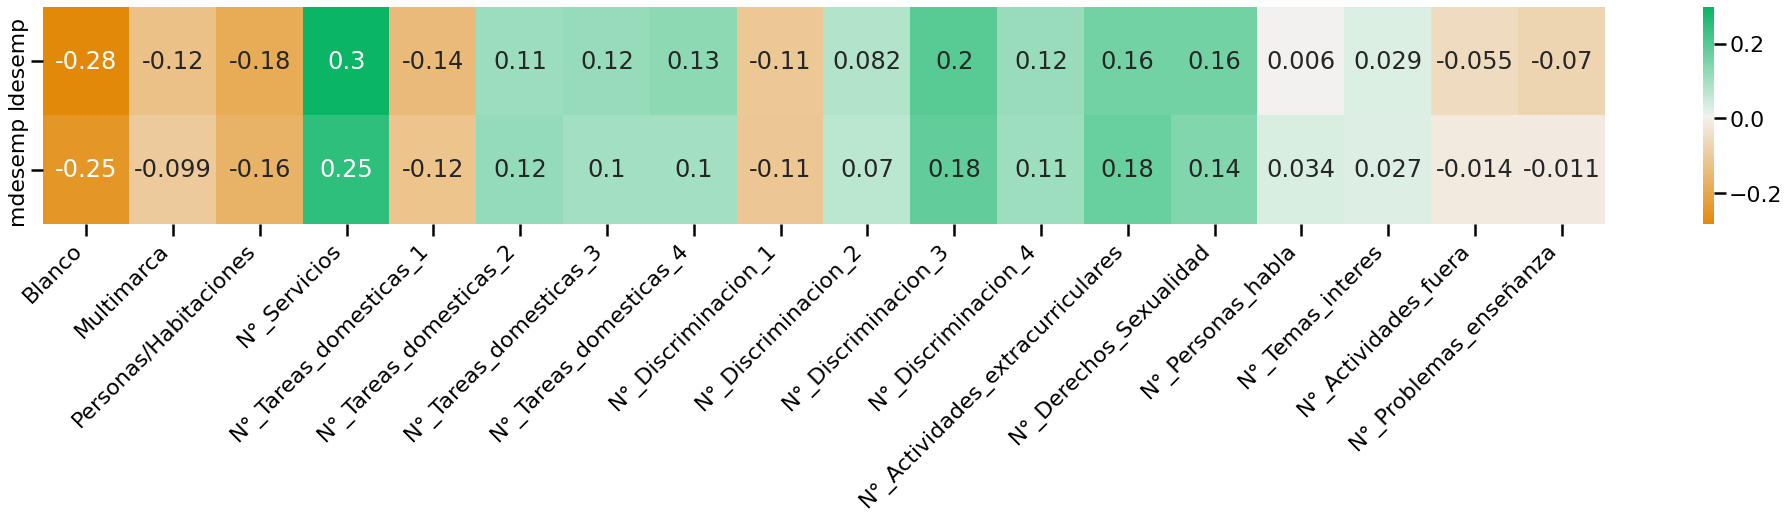

In [73]:
plt.figure(figsize=(35,4))
sns.heatmap(data_trabajo[nuevas_features+['ldesemp','mdesemp']].corr().loc[['ldesemp','mdesemp'],nuevas_features],annot=True,cmap=colores)
plt.xticks(rotation = 45,ha='right')

In [24]:
# fig, ax = plt.subplots(2, 3, figsize=[10, 10])

# for i,j in zip(['Blanco','Multimarca'],range(2)):
#   sns.histplot(data=data_trabajo, x=i,discrete=True,ax=ax[j,0])
#   sns.regplot(data=data_trabajo,x=i,y='mdesemp',order=1,ax=ax[j,1],line_kws={"color": "red"})
#   sns.regplot(data=data_trabajo,x=i,y='ldesemp',order=1,ax=ax[j,2],line_kws={"color": "red"})
# plt.tight_layout()

In [25]:
data_trabajo.duplicated(keep=False).sum()

2

## Preparaciond e sets de train y test

tenemos:
* X_drop_false: features sin drop first en las dummies
  * X_train
  * X_test
* X_drop_True: features con drop first en las dummies
  * X_train_t
  * X_test_t
* y: campos target ldesemp y mdesemp
  * y_train:
  * y_test:
  * y_train_l
  * y_train_m
  * y_test_l
  * y_test_m

In [26]:
X = data_trabajo.drop(columns=['ponder','lpondera','mpondera','lpuntaje','mpuntaje','ldesemp','mdesemp'])

In [27]:
columns = list(X.columns)
print(columns)
columns_cont = ['ap4','ap6'] + nuevas_features
columns_dummies = [x for x in columns if x not in columns_cont]
print(X.columns)
print('sin ap4: ',columns_dummies)

['ap1', 'ap2', 'ap3a', 'ap3b', 'ap3c', 'ap4', 'ap5a', 'ap5b', 'ap5c', 'ap5d', 'ap5e', 'ap5f', 'ap5g', 'ap5h', 'ap6', 'ap7a', 'ap7b', 'ap7c', 'ap7d', 'ap7e', 'ap7f', 'ap8', 'ap9', 'ap10', 'ap11', 'ap12', 'ap13a', 'ap13b', 'ap13c', 'ap14', 'ap15', 'ap16', 'ap17', 'ap18', 'ap19', 'ap20', 'ap21a', 'ap21b', 'ap22', 'ap23', 'ap24', 'ap25a', 'ap25b', 'ap25c', 'ap25d', 'ap25e', 'ap25f', 'ap25g', 'ap25h', 'ap26a', 'ap26b', 'ap26c', 'ap26d', 'ap26e', 'ap27a', 'ap27b', 'ap28a', 'ap28b', 'ap28c', 'ap28d', 'ap28e', 'ap28f', 'ap28g', 'ap28h', 'ap28i', 'ap28j', 'ap28k', 'ap28l', 'ap29a', 'ap29b', 'ap29c', 'ap29d', 'ap29e', 'ap29f', 'ap29g', 'ap30a', 'ap30b', 'ap30c', 'ap30d', 'ap30e', 'ap30f', 'ap30g', 'ap30h', 'ap30i', 'ap30j', 'ap30k', 'ap31', 'ap32a', 'ap32b', 'ap32c', 'ap32d', 'ap32e', 'ap32f', 'ap33', 'ap34a', 'ap34b', 'ap34c', 'ap35', 'ap36a', 'ap36b', 'ap36c', 'ap36d', 'ap37', 'ap38', 'ap39', 'ap40', 'ap41a', 'ap41b', 'ap41c', 'ap42', 'cod_provincia', 'sector', 'ambito', 'ICSE', 'isocioa', 'is

In [28]:
X_drop_false = pd.get_dummies(X,drop_first=False,columns=columns_dummies)

In [29]:
X_drop_true = pd.get_dummies(X,drop_first=True,columns=columns_dummies)

In [30]:
X_drop_false.head(3)

,ap4,ap6,Blanco,Multimarca,Personas/Habitaciones,N°_Servicios,N°_Tareas_domesticas_1,N°_Tareas_domesticas_2,N°_Tareas_domesticas_3,N°_Tareas_domesticas_4,...,isocioa_2,isocioa_3,isocioal_-1.0,isocioal_1.0,isocioal_2.0,isocioal_3.0,isocioam_-1.0,isocioam_1.0,isocioam_2.0,isocioam_3.0
0,10,3,3,0,3.333333,3,2,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,4,2,5,0,2.000000,1,0,0,1,2,...,0,0,0,1,0,0,0,1,0,0
2,6,7,7,0,0.857143,4,0,1,0,2,...,1,0,0,0,1,0,0,0,1,0


In [31]:
((X_drop_false.loc[:,['ap4','ap6']] == -6) | (X_drop_false.loc[:,['ap4','ap6']] == -9)).sum()

ap4    7672
ap6    7707
dtype: int64

In [32]:
#Estoy sacando de las columnas 'continuas' los valores -6 y -9, el resto ya estan en dummies con valores 0 y 1.
print(X_drop_false.shape)
X_drop_false.replace(to_replace=[-6,-9],value=np.NaN,inplace=True)
X_drop_false.dropna(inplace=True)
print(X_drop_false.shape)

print(X_drop_true.shape)
X_drop_true.replace(to_replace=[-6,-9],value=np.NaN,inplace=True)
X_drop_true.dropna(inplace=True)
print(X_drop_true.shape)

(539434, 586)
(527652, 586)
(539434, 471)
(527652, 471)


In [33]:
y = data_trabajo.copy().loc[X_drop_false.index,['mdesemp','ldesemp']]

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_drop_false,y,shuffle=True,test_size=0.3)

X_train_t = X_drop_true.copy().loc[X_train.index]
X_test_t = X_drop_true.copy().loc[X_test.index]

In [36]:
y_train_l = y_train.loc[:,'ldesemp']
y_train_m = y_train.loc[:,'mdesemp']
y_test_l = y_test.loc[:,'ldesemp']
y_test_m = y_test.loc[:,'mdesemp']

In [37]:
y_train_l

307833    4.0
464254    4.0
490840    2.0
285505    3.0
90946     3.0
         ... 
438167    2.0
555185    3.0
104180    4.0
447085    4.0
421083    3.0
Name: ldesemp, Length: 369356, dtype: float64

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
scaler = StandardScaler(with_mean=False)
X_train.loc[:,columns_cont] = scaler.fit_transform(X_train.loc[:,columns_cont])
X_test.loc[:,columns_cont] = scaler.transform(X_test.loc[:,columns_cont])
X_train_t.loc[:,columns_cont] = scaler.transform(X_train_t.loc[:,columns_cont])
X_test_t.loc[:,columns_cont] = scaler.transform(X_test_t.loc[:,columns_cont])

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

In [41]:
def results(model, X_train, X_test, y_train, y_test,plot_train=True):
  if plot_train:
    plt.figure(figsize=(10,10))
    print(f'Los resultados del modelo {model} son:\nEn train:')
    y_train_predict = model.predict(X_train)
    sns.heatmap(confusion_matrix(y_train,y_train_predict,labels=model.classes_),annot=True,fmt='d')
    plt.title('Matriz de confusion en train')
    plt.xlabel("Predicho")
    plt.ylabel("Observado")
    plt.show()
    print('f1 score:',f1_score(y_train,y_train_predict,average='macro'))
    print('accuracy:',accuracy_score(y_train,y_train_predict))
    print('\n')
  print('En test:')
  plt.figure(figsize=(10,10))
  y_test_predict = model.predict(X_test)
  sns.heatmap(confusion_matrix(y_test,y_test_predict,labels=model.classes_),annot=True,fmt='d')
  plt.title('Matriz de confusion en test')
  plt.xlabel("Predicho")
  plt.ylabel("Observado")  
  plt.show()
  print('f1 score:',f1_score(y_test,y_test_predict,average='macro'))
  print('accuracy:',accuracy_score(y_test,y_test_predict))

## Modelos: NB

In [42]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

### Lengua

In [43]:
naive_l = MultinomialNB()

naive_l.fit(X_train,y_train_l)

MultinomialNB()

Los resultados del modelo MultinomialNB() son:
En train:


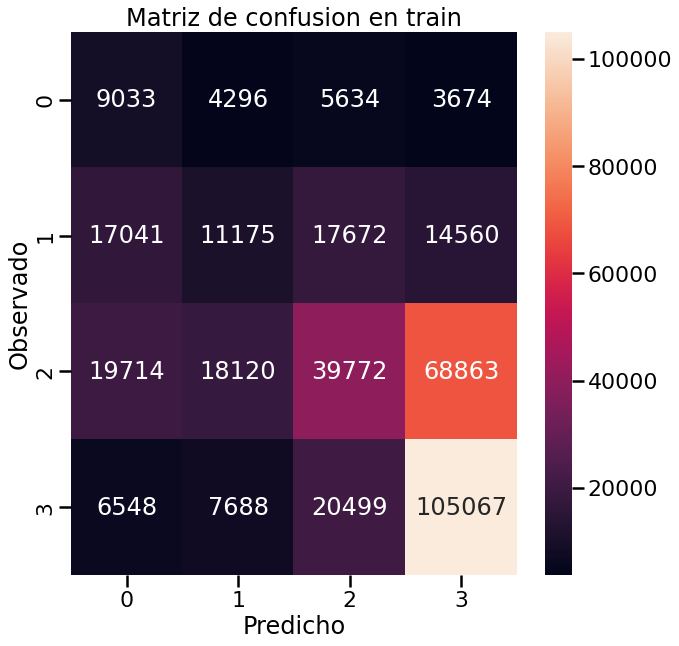

f1 score: 0.35986132859401077
accuracy: 0.4468507347924496


En test:


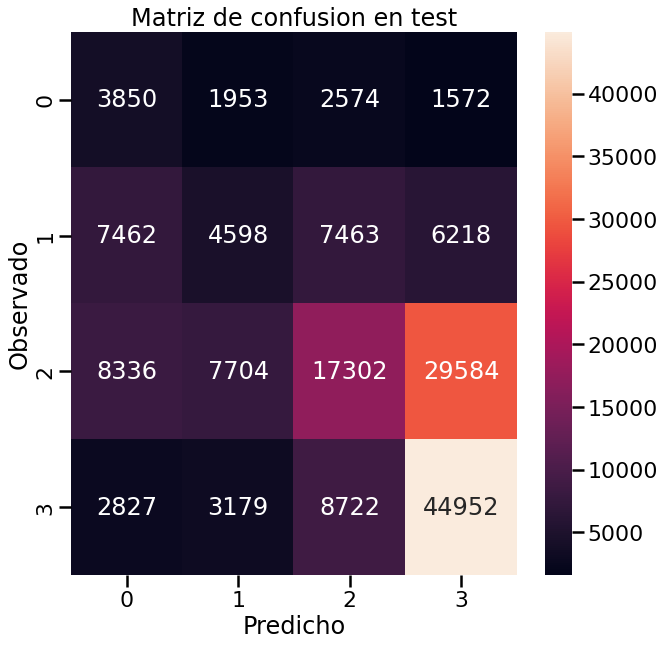

f1 score: 0.35828832740763406
accuracy: 0.4466442613837368


In [44]:
results(model=naive_l, X_train=X_train, X_test=X_test, y_train=y_train_l, y_test=y_test_l)

In [45]:
class_weights = dict(1/(y_train_l.value_counts()/y_train_l.shape[0]))
class_weights

{1.0: 16.31647303087865,
 2.0: 6.110309687665432,
 3.0: 2.521734974636271,
 4.0: 2.641993676771434}

In [98]:
y_train_l , y_train_l.map(class_weights)

(453801    4.0
 238472    1.0
 73813     2.0
 521082    3.0
 484149    3.0
          ... 
 58741     1.0
 499068    4.0
 371391    4.0
 532544    4.0
 493115    3.0
 Name: ldesemp, Length: 369356, dtype: float64, 453801     2.645116
 238472    16.320799
 73813      6.103141
 521082     2.520014
 484149     2.520014
             ...    
 58741     16.320799
 499068     2.645116
 371391     2.645116
 532544     2.645116
 493115     2.520014
 Name: ldesemp, Length: 369356, dtype: float64)

In [99]:
naive_l = MultinomialNB()



naive_l.fit(X_train,y_train_l,sample_weight=y_train_l.map(class_weights))

MultinomialNB()

In [51]:
y_predict

307833    2.0
464254    3.0
490840    3.0
285505    4.0
90946     2.0
         ... 
438167    3.0
555185    3.0
104180    4.0
447085    4.0
421083    4.0
Length: 369356, dtype: float64

Clase: 1	Recall: 0.39903697486416045
Clase: 2	Recall: 0.18486964002117523
Clase: 3	Recall: 0.27153868736729275
Clase: 4	Recall: 0.7515414657873278


,Recall,AUC
1,0.399,0.766
2,0.185,0.686
3,0.272,0.592
4,0.752,0.758


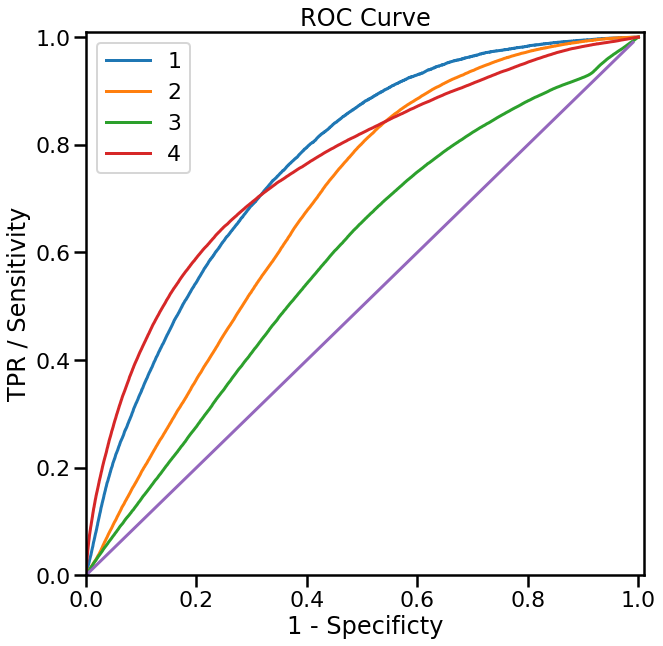

In [52]:
proba = naive_l.predict_proba(X_train)
y_predict = pd.Series(data=naive_l.predict(X_train), index=X_train.index)
plt.figure(figsize=(10,10))
recalls = pd.DataFrame()

for i in range(1,5):
  clases = list(range(1,5))
  clases.remove(i)
  a = zip(clases,[0,0,0])
  dic = dict(list(a)+[(i,1)])
  y_train_mono = y_train_l.map(dic)
  y_predict_mono = y_predict.map(dic)
  fpr,tpr,_ = roc_curve(y_train_mono, proba[:,i-1])
  print(f'Clase: {naive_l.classes_[i-1].astype(int)}\tRecall: {metrics.recall_score(y_train_mono,y_predict_mono)}')
  recalls.loc[i,'Recall'] = np.round(metrics.recall_score(y_train_mono,y_predict_mono),3)
  recalls.loc[i,'AUC'] = np.round(metrics.roc_auc_score(y_train_mono,proba[:,i-1]),3)
  df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
  plt.plot(df['fpr'],df['tpr'],label=i)

display(recalls)
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.legend()
plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.show()

### Matematica

In [92]:
naive_m = GaussianNB()
naive_m.fit(X_train,y_train_m)

GaussianNB()

Los resultados del modelo GaussianNB() son:
En train:


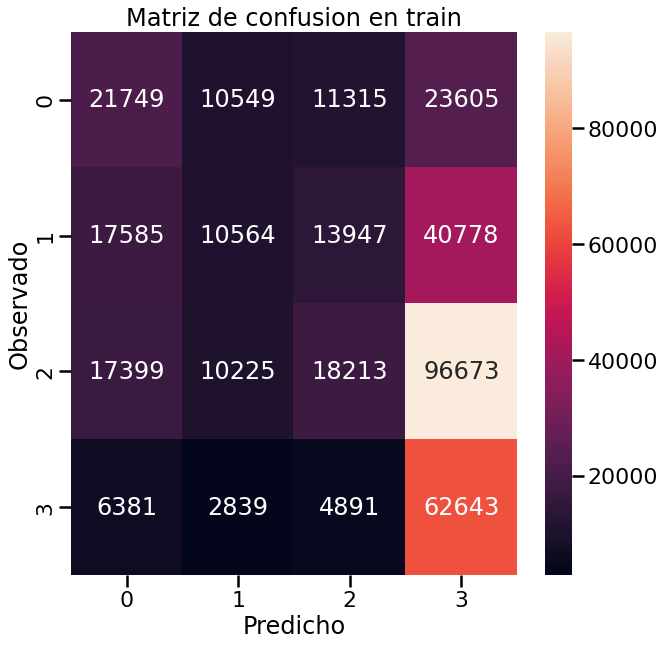

f1 score: 0.2805191139428117
accuracy: 0.3063954558745492


En test:


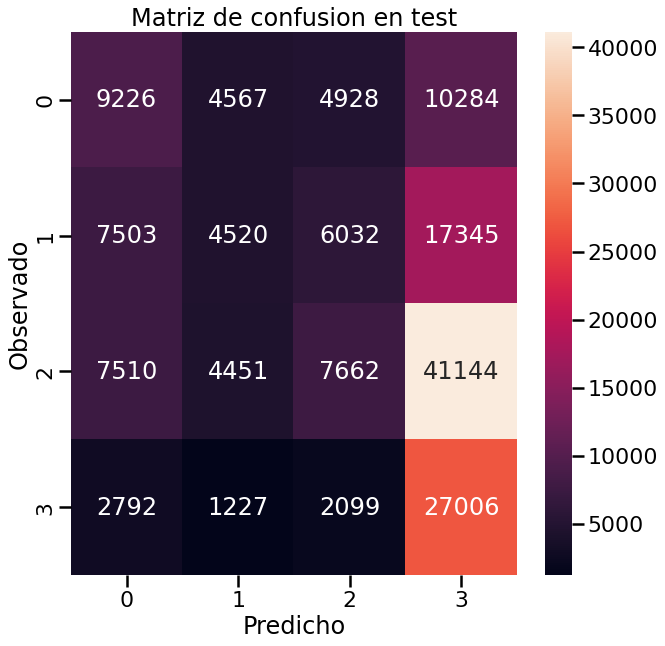

f1 score: 0.2791396529145347
accuracy: 0.30584474655076566


In [93]:
results(model=naive_m, X_train=X_train, X_test=X_test, y_train=y_train_m, y_test=y_test_m)

## Modelos: KNN

In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:
X_test_subset = X_test.sample(5000,random_state=1)
y_test_l_subset = y_test_l.loc[X_test_subset.index]
y_test_m_subset = y_test_m.loc[X_test_subset.index]

In [55]:
KNN_l = KNeighborsClassifier(n_neighbors=10)
KNN_m = KNeighborsClassifier(n_neighbors=10)

In [56]:
KNN_l.fit(X_train,y_train_l)
KNN_m.fit(X_train,y_train_m)

KNeighborsClassifier(n_neighbors=10)

In [57]:
# y_test_l_pred_knn = KNN_l.predict(X_test_subset)
# y_test_m_pred_knn = KNN_m.predict(X_test_subset)

En test:


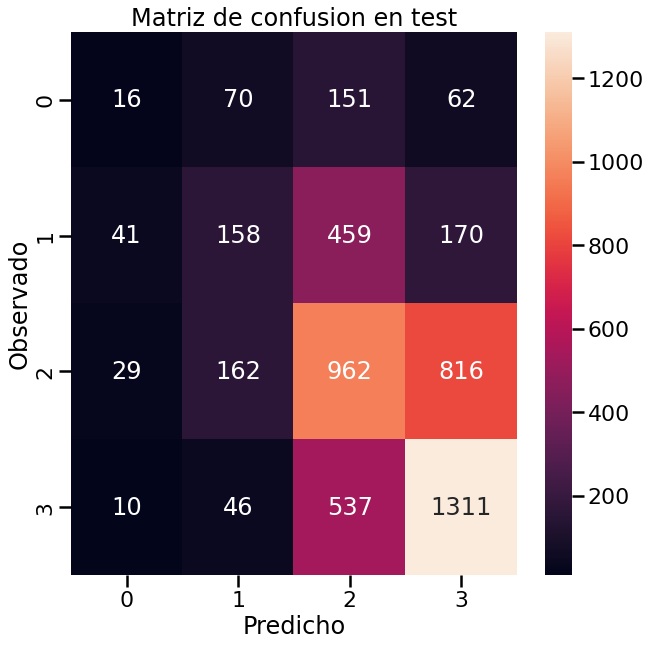

f1 score: 0.35446809429270265
accuracy: 0.4894


In [58]:
results(model=KNN_l, X_train=X_train, X_test=X_test_subset, y_train=y_train_l, y_test=y_test_l_subset,plot_train=False)

Clase: 1	Recall: 0.05351170568561873
Clase: 2	Recall: 0.19082125603864733
Clase: 3	Recall: 0.48857287963433216
Clase: 4	Recall: 0.6885504201680672


,Recall,AUC
1,0.054,0.654
2,0.191,0.684
3,0.489,0.577
4,0.689,0.755


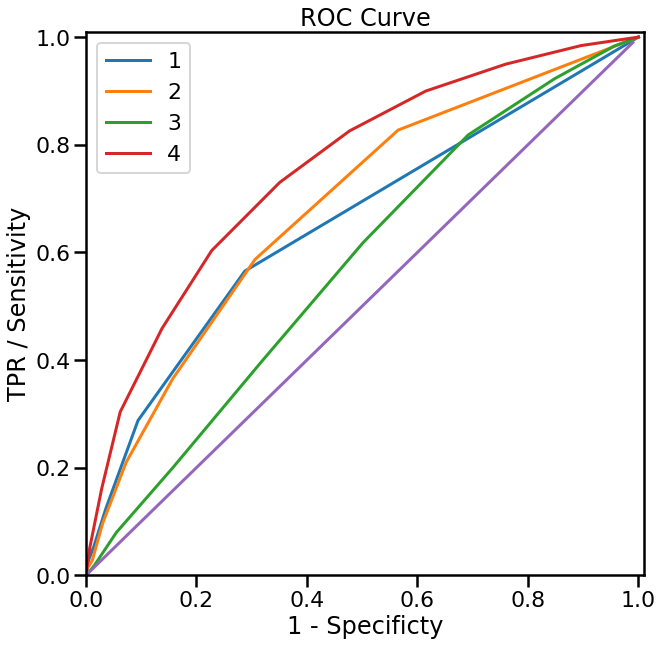

In [59]:
proba = KNN_l.predict_proba(X_test_subset)
y_predict = pd.Series(data=KNN_l.predict(X_test_subset), index=X_test_subset.index)
plt.figure(figsize=(10,10))
recalls = pd.DataFrame()

for i in range(1,5):
  clases = list(range(1,5))
  clases.remove(i)
  a = zip(clases,[0,0,0])
  dic = dict(list(a)+[(i,1)])
  y_train_mono = y_test_l_subset.map(dic)
  y_predict_mono = y_predict.map(dic)
  fpr,tpr,_ = roc_curve(y_train_mono, proba[:,i-1])
  print(f'Clase: {KNN_l.classes_[i-1].astype(int)}\tRecall: {metrics.recall_score(y_train_mono,y_predict_mono)}')
  recalls.loc[i,'Recall'] = np.round(metrics.recall_score(y_train_mono,y_predict_mono),3)
  recalls.loc[i,'AUC'] = np.round(metrics.roc_auc_score(y_train_mono,proba[:,i-1]),3)
  df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
  plt.plot(df['fpr'],df['tpr'],label=i)

display(recalls)
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.legend()
plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.show()

In [60]:
y_predict = KNN_l.predict(X_test_subset)

In [61]:
print(classification_report(y_test_l_subset,y_predict))

              precision    recall  f1-score   support

         1.0       0.17      0.05      0.08       299
         2.0       0.36      0.19      0.25       828
         3.0       0.46      0.49      0.47      1969
         4.0       0.56      0.69      0.62      1904

    accuracy                           0.49      5000
   macro avg       0.39      0.36      0.35      5000
weighted avg       0.46      0.49      0.47      5000



En test:


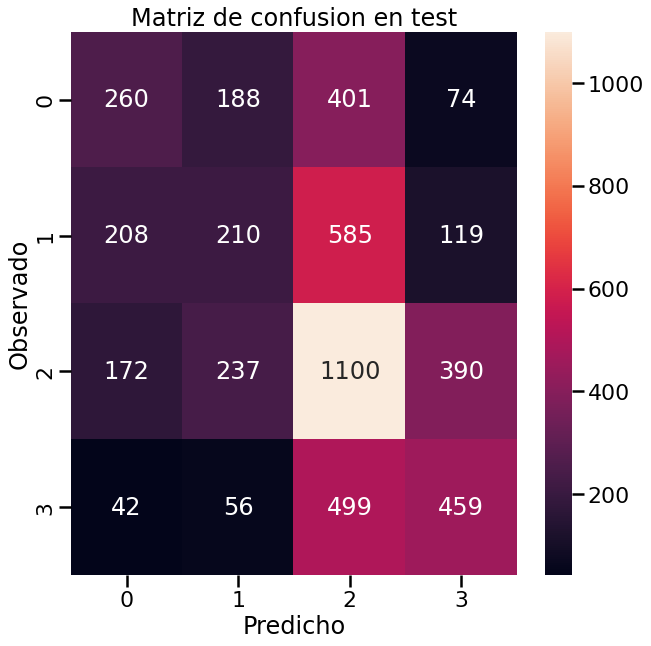

f1 score: 0.3709601785556595
accuracy: 0.4058


In [62]:
results(model=KNN_m, X_train=X_train, X_test=X_test_subset, y_train=y_train_m, y_test=y_test_m_subset,plot_train=False)

## Modelos: LogisticRegression

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
logreg_l = LogisticRegression(max_iter=100,C=0.002,solver='saga',penalty='l1',n_jobs=-1,class_weight='balanced')
#logreg_m = LogisticRegression(max_iter=300,C=1000)

In [65]:
logreg_l.fit(X_train_t,y_train_l)
#logreg_m.fit(X_train_t,y_train_m)

LogisticRegression(C=0.002, class_weight='balanced', n_jobs=-1, penalty='l1',
                   solver='saga')

Los resultados del modelo LogisticRegression(C=0.002, class_weight='balanced', n_jobs=-1, penalty='l1',
                   solver='saga') son:
En train:


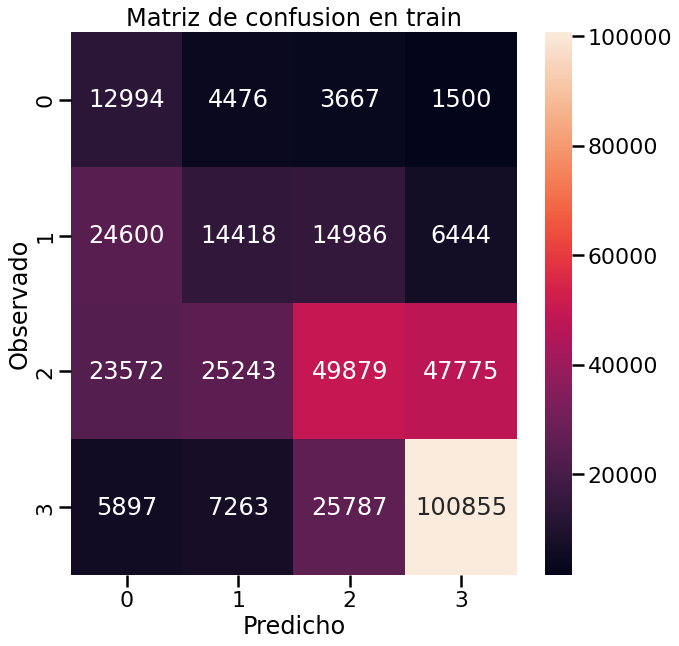

f1 score: 0.4106054240209782
accuracy: 0.48231516477328107


En test:


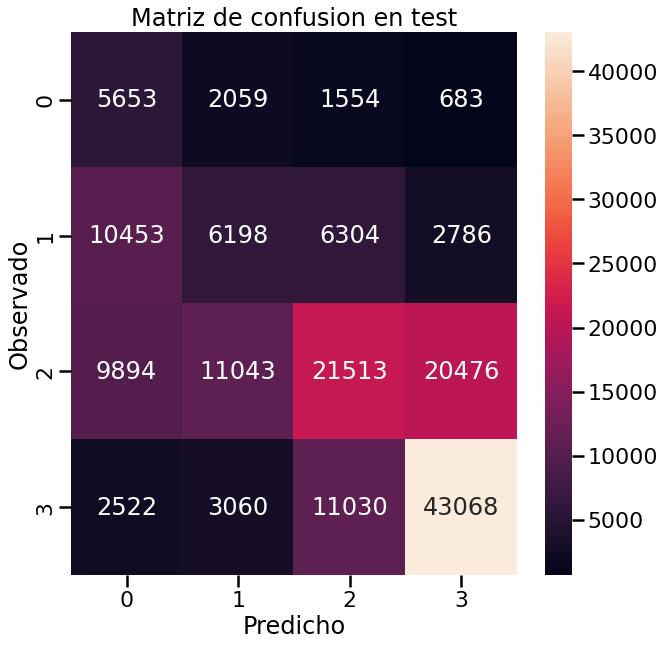

f1 score: 0.41196933015510473
accuracy: 0.4828422701773892


In [66]:
results(model=logreg_l, X_train=X_train_t, X_test=X_test_t, y_train=y_train_l, y_test=y_test_l)

In [ ]:
#results(model=logreg_m, X_train=X_train_t, X_test=X_test_t, y_train=y_train_m, y_test=y_test_m)

In [ ]:
sns.choose_diverging_palette()

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5]),
 <a list of 19 Text major ticklabel objects>)

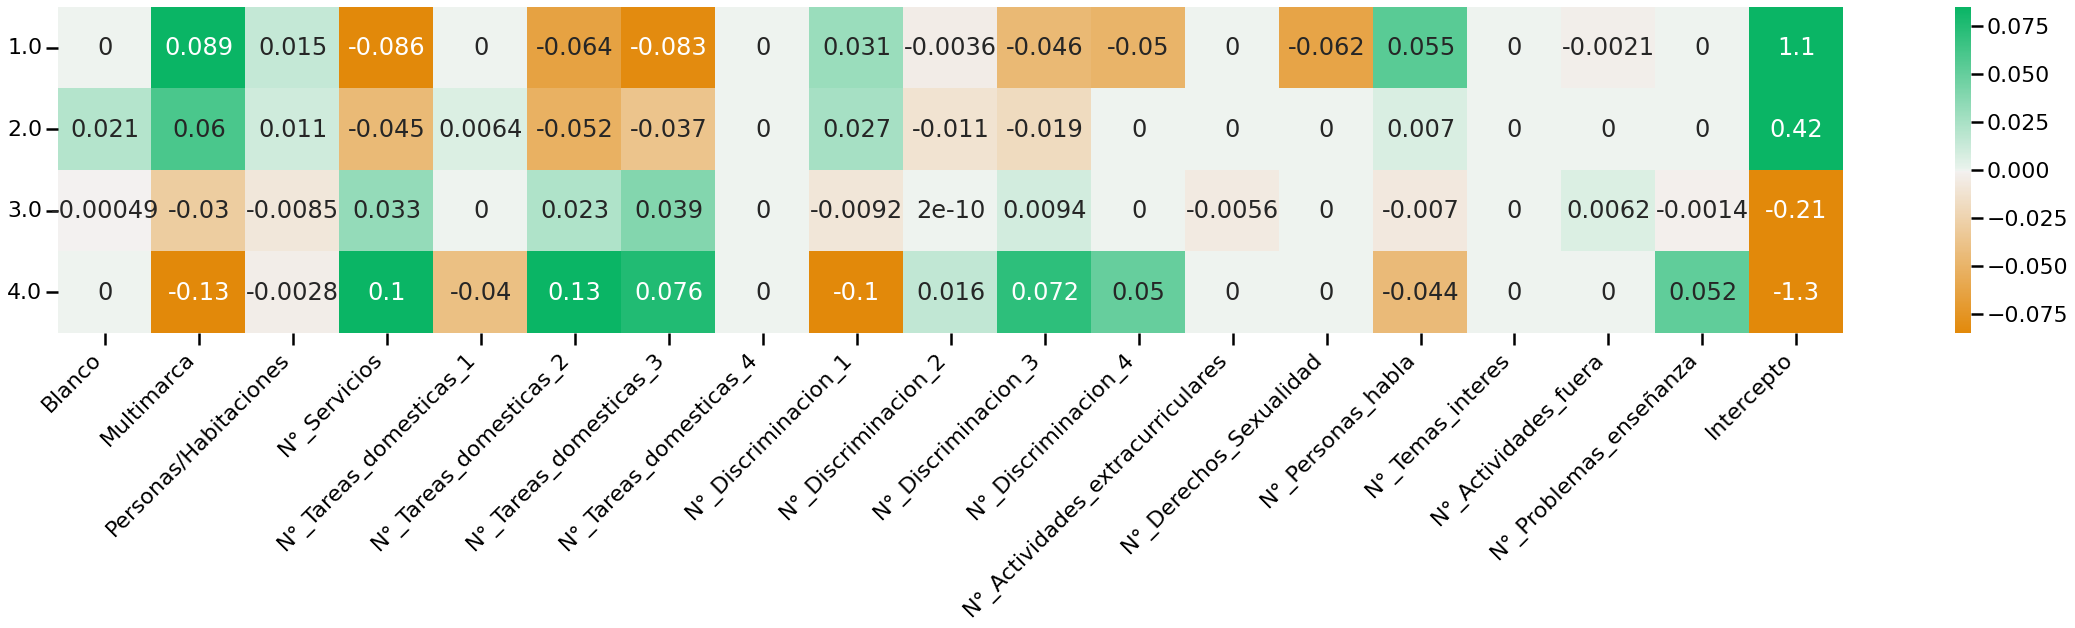

In [70]:
coeficientes = pd.DataFrame(data=logreg_l.coef_,columns=logreg_l.feature_names_in_,index=logreg_l.classes_).loc[:,nuevas_features]
coeficientes.loc[:,'Intercepto'] = logreg_l.intercept_

plt.figure(figsize=(40,6))
colores = sns.diverging_palette(40, 140,s=99,l=65, n=9,as_cmap=True) 
sns.heatmap(coeficientes,annot=True,cmap=colores,vmax=0.085,vmin=-0.085)
plt.yticks(rotation = 0)
plt.xticks(rotation = 45,ha='right')

In [71]:
dicc = {'ap9_1':'Nivel edu Mamá\nNo fue a la escuela','ap12_-6':'En casa hablan lengua indigena\nMultimarca',
        'ap15_1':'Trabajas no casa no familiar\nSí','ap16_-6':'Fuiste a jardin\nMultimarca',
        'ap21a_4':'En tu opinión, ¿cómo leés?\nNo muy bien','ap26e_-6':'Actividad cine, recital, teatro, museo\nMultimarca',
        'ap27b_-6':'¿Tu celular tiene internet?\nMultimarca','ap28k_-6':'Profesores importancia comunicar ideas\nMultimarca',
        'ap34c_-6':'Actividades culturales y\ndeportivas fuera de la escuela\nMultimaca',
        'ap41a_4':'Cómo fue resolver la prueba de Lengua\nMuy difícil',
        'cod_provincia_10':'Número de jurisdicción\nCatamarca','sector_2':'Sector de gestión\nPrivado',
        'ap33_4':'¿cuánto tiempo tardás en llegar a la escuela?\nMás de dos horas', 'ap36c':'Tareas que no entiendo o son muy difíciles\nMultimarca',
        'ap28c_-6':"¿Los docentes hablaron del embarazo\nMultimarca",'ap24_-6':'¿Tus maestros/as te vuelven a explicar si no entendés?\nMultimarca',
        'ap3b_6':'¿En qué país nació tu mamá?\nPerú','ap3b_-6':'¿En qué país nació tu mamá?\nMultimarca','ap3a_-6':'¿En qué país naciste?\nMultimarca',
        'ap8_1':'¿cuántos libros hay donde vivís?\nNo hay libros','ap14_1':'¿ayudás a tus padres o familiares en su trabajo?\nSí',
        'ap17_1':'¿Repetiste de grado alguna vez?\nNo','ap20_3':'¿Te va bien en tu clase de Lengua?\nAlgunas veces',
        'ap21a_3':'En tu opinión, ¿cómo leés?\nMás o menos bien','ap25c_4':'¿Los estudiantes de tu escuela\ndiscriminan por la religión?\nNunca',
        'ap25d_4':'¿Los estudiantes de tu escuela\ndiscriminan por los aspectos físicos?\nNunca',
        'ap25g_4':'¿Los estudiantes de tu escuela\ndiscriminan por tener alguna discapacidad?\nNunca',
        'ap31_2':'¿Buscás información o conversás\nsobre estos temas en internet?\nNo',
        'ap41c_1':'¿Cómo fue resolver este cuestionario?\nMuy fácil'}
nuevas_columnas = pd.Series(logreg_l.feature_names_in_).replace(dicc)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]), <a list of 12 Text major ticklabel objects>)

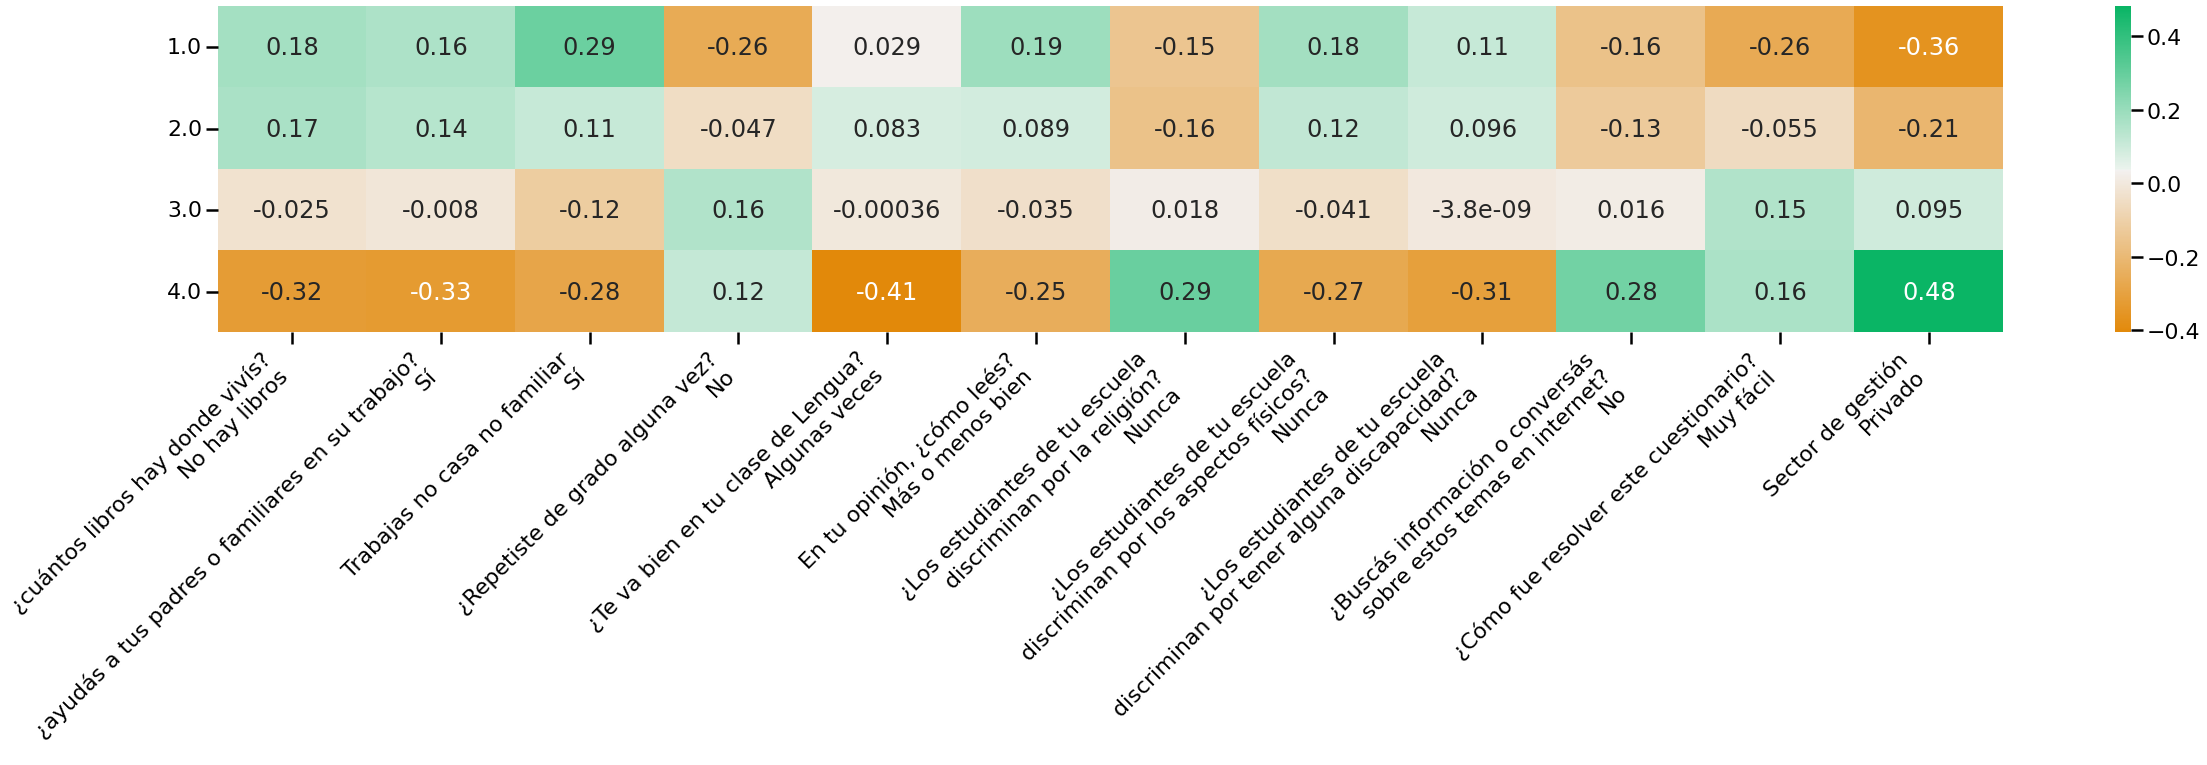

In [72]:
a = pd.DataFrame(data=logreg_l.coef_,columns=nuevas_columnas,index=logreg_l.classes_).drop(columns=nuevas_features)
b = a.apply(lambda a : a if (a[a.idxmax()]-a[a.idxmin()]) > 0.4 else [np.NaN]*4, axis=0)
b.dropna(axis=1,inplace=True)
plt.figure(figsize=(40,6))
sns.heatmap(b,annot=True,cmap=colores)#,vmax=0.06,vmin=-0.06)
plt.yticks(rotation = 0)
plt.xticks(rotation = 45,ha='right')

In [57]:
a = pd.DataFrame(data=logreg_l.coef_,columns=nuevas_columnas,index=logreg_l.classes_)#.drop(columns=nuevas_features)
b = a.apply(lambda a : (a[a.idxmax()]-a[a.idxmin()]) != 0 , axis=0)
b.sum()

167

Clase: 1	Recall: 0.5740159915183107
Clase: 2	Recall: 0.2385190577024881
Clase: 3	Recall: 0.3405430500652015
Clase: 4	Recall: 0.7214131414428978


,Recall,AUC
1,0.574,0.817
2,0.239,0.759
3,0.341,0.627
4,0.721,0.814


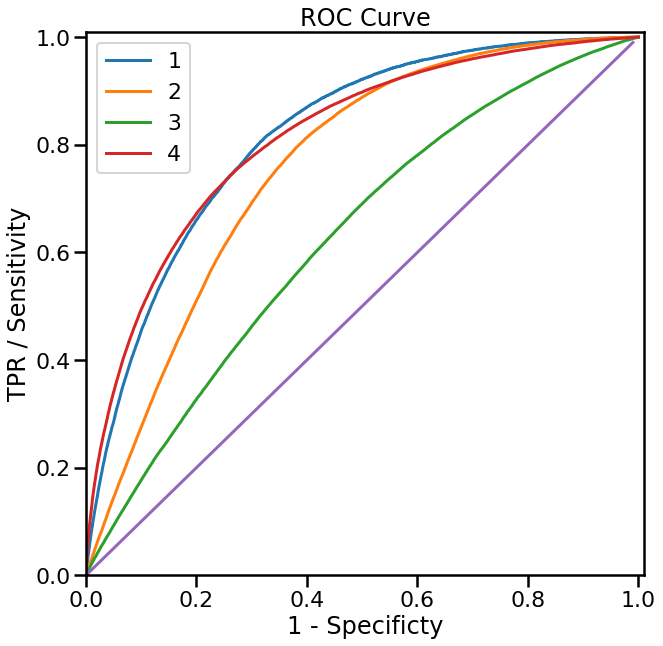

In [67]:
proba = logreg_l.predict_proba(X_train_t)
y_predict = pd.Series(data=logreg_l.predict(X_train_t), index=X_train_t.index)
plt.figure(figsize=(10,10))
recalls = pd.DataFrame()

for i in range(1,5):
  clases = list(range(1,5))
  clases.remove(i)
  a = zip(clases,[0,0,0])
  dic = dict(list(a)+[(i,1)])
  y_train_mono = y_train_l.map(dic)
  y_predict_mono = y_predict.map(dic)
  fpr,tpr,_ = roc_curve(y_train_mono, proba[:,i-1])
  print(f'Clase: {logreg_l.classes_[i-1].astype(int)}\tRecall: {metrics.recall_score(y_train_mono,y_predict_mono)}')
  recalls.loc[i,'Recall'] = np.round(metrics.recall_score(y_train_mono,y_predict_mono),3)
  recalls.loc[i,'AUC'] = np.round(metrics.roc_auc_score(y_train_mono,proba[:,i-1]),3)
  df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
  plt.plot(df['fpr'],df['tpr'],label=i)

display(recalls)
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.legend()
plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.show()

Cambios:
-cambio de tipo de metrica en f1 score.
-agregado de pesos en regresion logistica
-agregado de pesos en multinomial NB
-grafica ROC para modelo logistico

### Statmodels

In [41]:
from statsmodels.discrete.discrete_model import MNLogit

In [ ]:
# X_train_t_sample = X_train_t.sample(10).drop(columns=X_train_t.columns[-466:])
# y_train_l_sample = y_train_l.loc[X_train_t_sample.index]

In [62]:
smlog = MNLogit(X_train_t.loc[:,b.values],y_train_l)
smlog = smlog.fit_regularized(maxiter=30,method='l1',alpha=1/0.002)

/usr/local/lib/python3.7/dist-packages/statsmodels/discrete/discrete_model.py:2195: RuntimeWarning: overflow encountered in exp
  eXB = np.column_stack((np.ones(len(X)), np.exp(X)))
/usr/local/lib/python3.7/dist-packages/statsmodels/discrete/discrete_model.py:2196: RuntimeWarning: invalid value encountered in true_divide
  return eXB/eXB.sum(1)[:,None]
/usr/local/lib/python3.7/dist-packages/statsmodels/discrete/discrete_model.py:2227: RuntimeWarning: divide by zero encountered in log
  logprob = np.log(self.cdf(np.dot(self.exog,params)))
/usr/local/lib/python3.7/dist-packages/statsmodels/discrete/discrete_model.py:2228: RuntimeWarning: invalid value encountered in multiply
  return np.sum(d * logprob)


Iteration limit exceeded    (Exit mode 9)
            Current function value: 364.1928824875664
            Iterations: 31
            Function evaluations: 322
            Gradient evaluations: 31


/usr/local/lib/python3.7/dist-packages/statsmodels/base/l1_solvers_common.py:73: ConvergenceWarning: QC check did not pass for 166 out of 166 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/l1_solvers_common.py:146: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [63]:
smlog.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:               369356
Model:                        MNLogit   Df Residuals:                   369190
Method:                           MLE   Df Model:                            0
Date:                Thu, 24 Mar 2022   Pseudo R-squ.:                  -152.7
Time:                        07:18:24   Log-Likelihood:            -1.3448e+08
converged:                      False   LL-Null:                   -8.7492e+05
Covariance Type:            nonrobust   LLR p-value:                       nan
==================================================================================
                             y=ap6       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
ldesemp                                1.0712      0.015     69.135      0.000       1.041       1.102
------------------------------------------------------------------------------------------------------
  y=Blanco       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ldesemp        0.5766      0.016     35.216      0.000       0.545       0.609
------------------------------------------------------------------------------
y=Multimarca       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
ldesemp          0.1979      0.019     10.475      0.000       0.161       0.235
--------------------------------------------------------------------------------
y=Personas/Habitaciones       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
ldesemp                     0.9034      0.016     57.726      0.000       0.873       0.934
-------------------------------------------------------------------------------------------
y=N°_Servicios       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
ldesemp            1.2952      0.015     84.157      0.000       1.265       1.325
----------------------------------------------------------------------------------
y=N°_Tareas_domesticas_1       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
ldesemp                      0.4841      0.017     28.881      0.000       0.451       0.517
--------------------------------------------------------------------------------------------
y=N°_Tareas_domesticas_2       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
ldesemp                      0.5796      0.016     35.423      0.000       0.548       0.612
--------------------------------------------------------------------------------------------
y=N°_Tareas_domesticas_3       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
ldesemp                      0.8271      0.016     52.494      0.000       0.796       0.858
--------------------------------------------------------------------------------------------
y=N°_Discriminacion_1       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
ldesemp                   0.3613      0.017     20.676      0.000       0.327       0.396
--------------------